### Proga princesses

Анализ базы данных.

Выкачиваем базу, читаем с помощью Pandas. В данных нет пропусков.

In [1]:
import pandas as pd

df = pd.read_csv("princess_corpus.csv", sep=",")
df

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5
...,...,...,...,...,...,...,...
7743,LATE,we are never closing them again.,PRINCESS,Frozen,elsa,2013,984
7744,LATE,form on anna's boots.,PRINCESS,Frozen,elsa,2013,985
7745,LATE,"what? oh, elsa, they're beautiful, but you kno...",PRINCESS,Frozen,anna,2013,986
7746,LATE,look out. reindeer coming through!,NON-P,Frozen,kristoff,2013,987


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Disney_Period     7748 non-null   object
 1   Text              7748 non-null   object
 2   Speaker_Status    7748 non-null   object
 3   Movie             7748 non-null   object
 4   Speaker           7748 non-null   object
 5   Year              7748 non-null   int64 
 6   UTTERANCE_NUMBER  7748 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 423.8+ KB


#### Анаризируем данные

Посмотрим на то, как менялись фильмы в разные периоды. В том числе на количество реплик в фильмах и у персонажа.

Считаем количество реплик в каждом периоде.

Данные не репрезентативны, так как в среднем периоде было больше всего фильмов.

In [3]:
words_to_period_df = df["Disney_Period"].value_counts()
words_to_period_df

MID      4155
LATE     2268
EARLY    1325
Name: Disney_Period, dtype: int64

<AxesSubplot:title={'center':'Кол-во реплик на период'}, xlabel='Период', ylabel='Кол-во реплик'>

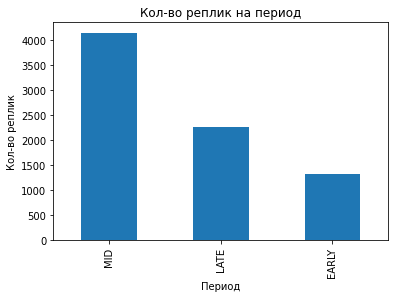

In [4]:
words_to_period_df = df["Disney_Period"].value_counts().plot.bar(
    title='Кол-во реплик на период',
    xlabel="Период",
    ylabel="Кол-во реплик"
)
words_to_period_df

Поэтому дальше смотрим количество реплик в каждом фильме.

In [5]:
words_to_movie_df = df["Movie"].value_counts()
words_to_movie_df

Frozen                        988
The Lion King                 952
Aladdin                       842
Beauty and the Beast          772
The Princess and the Frog     676
Pocahontas                    638
Mulan                         554
Cinderella                    497
Sleeping Beauty               462
Brave                         411
The Little Mermaid            397
Snow White                    366
Tangled                       193
Name: Movie, dtype: int64

<AxesSubplot:title={'center':'Кол-во реплик на фильм'}, xlabel='Фильм', ylabel='Кол-во реплик'>

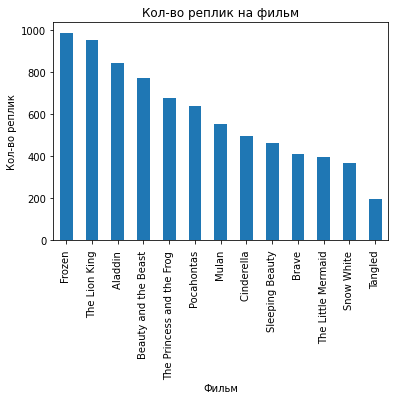

In [6]:
words_to_movie_df = df["Movie"].value_counts().plot.bar(
    title='Кол-во реплик на фильм',
    xlabel="Фильм",
    ylabel="Кол-во реплик"
)
words_to_movie_df

Упорядочим фильмы по периодам, чтобы было нагляднее, в каком периоде в фильмах больше фраз.

Рекордсмен по количеству фраз - "Frozen". В остальном, в целом, фильмы среднего периода правда содержат больше реплик.

In [7]:
movie_period = df.groupby(["Disney_Period", "Movie"]).agg({"Text": "count"})
movie_period

Text
Disney_Period Movie                           
EARLY         Cinderella                   497
              Sleeping Beauty              462
              Snow White                   366
LATE          Brave                        411
              Frozen                       988
              Tangled                      193
              The Princess and the Frog    676
MID           Aladdin                      842
              Beauty and the Beast         772
              Mulan                        554
              Pocahontas                   638
              The Lion King                952
              The Little Mermaid           397

<AxesSubplot:title={'center':'Кол-во реплик на фильм'}, xlabel='Фильм', ylabel='Кол-во реплик'>

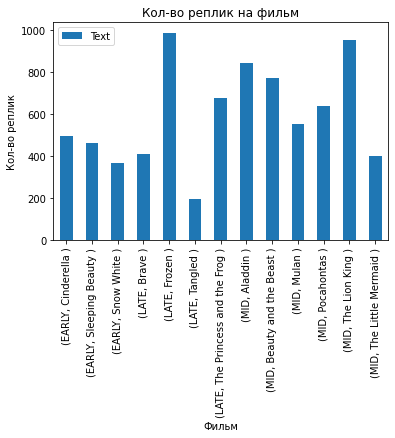

In [8]:
movie_period = df.groupby(["Disney_Period", "Movie"]).agg({"Text": "count"}).plot.bar(
    title='Кол-во реплик на фильм',
    xlabel="Фильм",
    ylabel="Кол-во реплик"
)
movie_period

Считаем количество реплик принца/принцессы/другого персонажа на фильм.

In [11]:
princess_text = df.groupby(["Disney_Period", "Movie", "Speaker_Status"]).agg({"Text": "count"})
princess_text

Text
Disney_Period Movie                      Speaker_Status      
EARLY         Cinderella                 NON-P            376
                                         PRINCE             9
                                         PRINCESS         112
              Sleeping Beauty            NON-P            403
                                         PRINCE            24
                                         PRINCESS          35
              Snow White                 NON-P            274
                                         PRINCE             4
                                         PRINCESS          88
LATE          Brave                      NON-P            232
                                         PRINCESS         179
              Frozen                     NON-P            519
                                         PRINCE            23
                                         PRINCESS         446
              Tangled                    NON-P             61
                                         PRINCE            48
                                         PRINCESS          84
              The Princess and the Frog  NON-P            375
                                         PRINCE           125
                                         PRINCESS         176
MID           Aladdin                    NON-P            482
                                         PRINCE           243
                                         PRINCESS         117
              Beauty and the Beast       NON-P            532
                                         PRINCE            90
                                         PRINCESS         150
              Mulan                      NON-P            378
                                         PRINCE            60
                                         PRINCESS         116
              Pocahontas                 NON-P            371
                                         PRINCE           125
                                         PRINCESS         142
              The Lion King              NON-P            637
                                         PRINCE           241
                                         PRINCESS          74
              The Little Mermaid         NON-P            285
                                         PRINCE            38
                                         PRINCESS          74

<AxesSubplot:title={'center':'Кол-во реплик персонажа на фильм'}, xlabel='Фильм', ylabel='Кол-во реплик'>

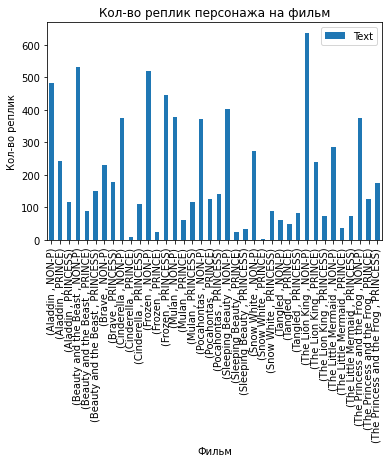

In [10]:
bar_princess_text = df.groupby(["Movie", "Speaker_Status"]).agg({"Text": "count"}).plot.bar(
    title='Кол-во реплик персонажа на фильм',
    xlabel="Фильм",
    ylabel="Кол-во реплик"
)
bar_princess_text

Можно также посчитать реплики всех персонажей каждого фильма и увидеть, что говорят какое-то значимое кол-во реплик обычно всего несколько персонажей.

In [12]:
first_year = df.groupby(["Disney_Period", "Movie", "Speaker"]).agg({"Text": list})
first_year

Text
Disney_Period Movie               Speaker                                                                  
EARLY         Cinderella          anastasia               [cinderella! , well! it's about time! don't fo...
                                  anastasia and drizella  [cinderella! , cinderella! , cinderella! cinde...
                                  birds                                              [what kind of dream? ]
                                  birds chirping                                                    [why? ]
                                  both                    [so this is what makes life divine i'm all agl...
...                                                                                                     ...
MID           The Little Mermaid  triton's daughters      [ah, we are the daughters of triton. great fat...
                                  ursula                  [yeeeeeees, hurry home, princess. we wouldn't ...
                                  vanessa                 [what a lovely little bride i'll make, my dear...
                                  woman 1                 [well you must have at least heard about this ...
                                  woman 2                 [well, gretchen says . . . , . . . since when ...

[462 rows x 1 columns]

In [16]:
first_year = df.groupby(["Disney_Period", "Movie", "Speaker"]).agg({"Text": "count"})
first_year

Text
Disney_Period Movie               Speaker                     
EARLY         Cinderella          anastasia                 39
                                  anastasia and drizella     9
                                  birds                      1
                                  birds chirping             1
                                  both                       1
...                                                        ...
MID           The Little Mermaid  triton's daughters         1
                                  ursula                    33
                                  vanessa                    4
                                  woman 1                    1
                                  woman 2                    3

[462 rows x 1 columns]